# Clustering Crypto

In [2]:
# Initial imports
import pandas as pd
import altair as alt
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
!pip install -U altair

Requirement already up-to-date: altair in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (4.1.0)
Requirement not upgraded as not directly required: jinja2 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (2.10)
Requirement not upgraded as not directly required: jsonschema in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (2.6.0)
Requirement not upgraded as not directly required: pandas>=0.18 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (0.24.2)
Requirement not upgraded as not directly required: entrypoints in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (0.2.3)
Requirement not upgraded as not directly required: numpy in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (1.14.3)
Requirement not upgraded as not directly required: toolz in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-package

### Data Preprocessing

In [3]:
# Loade the cryptocurrencies data
file_path = Path("Data/crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
crypto_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [5]:
# Keep only cryptocurrencies that are on trading
Ncrypto_df = crypto_df.loc[crypto_df["IsTrading"] == True ]
Ncrypto_df.head(5)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
# Keep only cryptocurrencies
import math
Ncrypto_df = Ncrypto_df.loc[Ncrypto_df["Algorithm"] != "N/A"]
Ncrypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [7]:
# Remove the "IsTrading" column
Ncrypto_df.drop(columns=["IsTrading"], inplace=True)
Ncrypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [8]:
for column in Ncrypto_df.columns:
    print(f"Column {column} has {Ncrypto_df[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [9]:
# Remove rows with at least 1 null value
Ncrypto_df.dropna()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [10]:
# Remove rows with cryptocurrencies without coins mined

Ncrypto_df = Ncrypto_df.loc[Ncrypto_df["TotalCoinsMined"] >= 0]
Ncrypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [11]:
# Fetch the cryptocurrencies names prior to drop them from crypto_df
Coin_names_df = crypto_df["CoinName"].to_frame()
Coin_names_df.head()

,CoinName
42,42 Coin
365,365Coin
404,404Coin
611,SixEleven
808,808


In [12]:
# Remove the cryptocurrency name since it's not going to be used on the clustering algorithm
Ncrypto_df.drop(columns=["CoinName"], inplace=True)
Ncrypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000


In [13]:
# Create dummies variables for text features
X =  pd.get_dummies(columns=["Algorithm", "ProofType"], data=Ncrypto_df)
X.head()                    

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
808,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Standardize data


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.


### Reducing Dimensions Using PCA

In [15]:
# Use PCA to reduce dimension to 3 principal components
pca = PCA(n_components=3)

In [16]:
# Create a DataFrame with the principal components data
Crypto_pca = pca.fit_transform(X)
Crypto_pca

array([[-0.23095225,  1.19807231, -0.38084125],
       [-0.21679436,  1.19671162, -0.38159768],
       [-0.12287656,  0.83615412, -0.26586862],
       ...,
       [-0.15098667, -2.26782477,  0.25627931],
       [-0.28230263, -2.1011275 ,  0.27114752],
       [-0.08713276,  0.76488122, -0.17051296]])

### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [17]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range ok k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(Crypto_pca)
    inertia.append(km.inertia_)


# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
alt.Chart(df_elbow).mark_line().encode(x="k", y="inertia")

alt.Chart(...)

Running K-Means with `k=4`

In [18]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(Crypto_pca)

# Predict clusters
predictions = model.predict(Crypto_pca)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
df_Crypto_pca = pd.DataFrame(
    data=Crypto_pca,
    columns=["principal component 1", "principal component 2", "principal component 3"],index=Ncrypto_df.index
)
df_Crypto_pca["class"] = model.labels_
df_Crypto_pca.head()

,principal component 1,principal component 2,principal component 3,class
42,-0.230952,1.198072,-0.380841,0
404,-0.216794,1.196712,-0.381598,0
808,-0.122877,0.836154,-0.265869,0
1337,0.326651,1.930143,-0.456202,0
BTC,-0.211385,-1.427516,0.094165,1


In [19]:
pca.explained_variance_ratio_

array([0.02082454, 0.01961126, 0.01874987])

In [20]:
df_Crypto_pca.head()

,principal component 1,principal component 2,principal component 3,class
42,-0.230952,1.198072,-0.380841,0
404,-0.216794,1.196712,-0.381598,0
808,-0.122877,0.836154,-0.265869,0
1337,0.326651,1.930143,-0.456202,0
BTC,-0.211385,-1.427516,0.094165,1


In [21]:
clustered_df = pd.concat([df_Crypto_pca, Ncrypto_df], sort=False, axis = 1)
clustered_df.head()

,principal component 1,principal component 2,principal component 3,class,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,-0.230952,1.198072,-0.380841,0,Scrypt,PoW/PoS,4.199995e+01,42
404,-0.216794,1.196712,-0.381598,0,Scrypt,PoW/PoS,1.055185e+09,532000000
808,-0.122877,0.836154,-0.265869,0,SHA-256,PoW/PoS,0.000000e+00,0
1337,0.326651,1.930143,-0.456202,0,X13,PoW/PoS,2.927942e+10,314159265359
BTC,-0.211385,-1.427516,0.094165,1,SHA-256,PoW,1.792718e+07,21000000


### Visualizing Results

#### 3D-Scatter with Clusters

In [22]:
# Create a 3D-Scatt er with the PCA data and the clusters
#fig = pd.scatter_3d(
#     df_Crypto_pca,
#     x= "PC 1",
#     y= "PC 2",
#     z= "principal component 3",
#     color="class",
#     symbol="class",
#     width=800,
# )
# fig.update_layout(legend=dict(x=0, y=1))
# fig.show()

In [23]:
df_Crypto_pca

,principal component 1,principal component 2,principal component 3,class
42,-0.230952,1.198072,-0.380841,0
404,-0.216794,1.196712,-0.381598,0
808,-0.122877,0.836154,-0.265869,0
1337,0.326651,1.930143,-0.456202,0
BTC,-0.211385,-1.427516,0.094165,1
ETH,-0.315365,-2.109707,0.237490,1
LTC,-0.318855,-1.065656,-0.020840,1
DASH,-0.205881,1.445532,-0.369163,0
XMR,-0.316753,-2.202975,0.226571,1
ETC,-0.315289,-2.109714,0.237486,1


In [26]:
import matplotlib.pyplot as plt

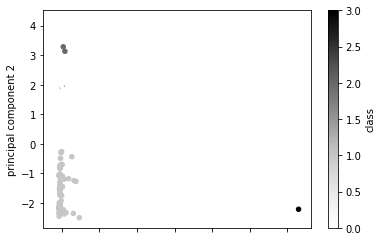

In [27]:
df_Crypto_pca.plot.scatter(x = "principal component 1", y = "principal component 2", c= "class")
plt.show()

#### Table of Tradable Cryptocurrencies

In [28]:
crypto_table = clustered_df
crypto_table

,principal component 1,principal component 2,principal component 3,class,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,-0.230952,1.198072,-0.380841,0,Scrypt,PoW/PoS,4.199995e+01,42
404,-0.216794,1.196712,-0.381598,0,Scrypt,PoW/PoS,1.055185e+09,532000000
808,-0.122877,0.836154,-0.265869,0,SHA-256,PoW/PoS,0.000000e+00,0
1337,0.326651,1.930143,-0.456202,0,X13,PoW/PoS,2.927942e+10,314159265359
BTC,-0.211385,-1.427516,0.094165,1,SHA-256,PoW,1.792718e+07,21000000
ETH,-0.315365,-2.109707,0.237490,1,Ethash,PoW,1.076842e+08,0
LTC,-0.318855,-1.065656,-0.020840,1,Scrypt,PoW,6.303924e+07,84000000
DASH,-0.205881,1.445532,-0.369163,0,X11,PoW/PoS,9.031294e+06,22000000
XMR,-0.316753,-2.202975,0.226571,1,CryptoNight-V7,PoW,1.720114e+07,0
ETC,-0.315289,-2.109714,0.237486,1,Ethash,PoW,1.133597e+08,210000000


In [29]:
# Print the total number of tradable cryptocurrencies
print(crypto_table.count())

principal component 1    684
principal component 2    684
principal component 3    684
class                    684
Algorithm                684
ProofType                684
TotalCoinsMined          684
TotalCoinSupply          684
dtype: int64


#### Scatter Plot with Tradable Cryptocurrencies

In [31]:
# Scale data to create the scatter plot,
Coin_names_scaled = MinMaxScaler().fit_transform(clustered_df[["TotalCoinsMined", "TotalCoinSupply"]])
print(Coin_names_scaled[0:2])

[[4.24246795e-11 4.55364914e-16]
 [1.06585549e-03 5.76795558e-09]]


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [32]:
#Coin_names_scaled.head()
Coin_names_scaled = pd.DataFrame(Coin_names_scaled, columns=["TotalCoinsMined", "TotalCoinSupply"], index=clustered_df.index)

Coin_names_scaled.head()

,TotalCoinsMined,TotalCoinSupply
42,4.242468e-11,4.553649e-16
404,1.065855e-03,5.767956e-09
808,0.000000e+00,0.000000e+00
1337,2.957551e-02,3.406122e-06
BTC,1.810846e-05,2.276825e-10


In [33]:
Coin_names_scaled["class"] = clustered_df["class"]
Coin_names_scaled.head()

,TotalCoinsMined,TotalCoinSupply,class
42,4.242468e-11,4.553649e-16,0
404,1.065855e-03,5.767956e-09,0
808,0.000000e+00,0.000000e+00,0
1337,2.957551e-02,3.406122e-06,0
BTC,1.810846e-05,2.276825e-10,1


In [34]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
source = Coin_names_scaled

alt.Chart(source).mark_circle().encode(
    alt.X('TotalCoinsMined', scale=alt.Scale(zero=False)),
    alt.Y('TotalCoinSupply', scale=alt.Scale(zero=False, padding=1)),
    color='class',
)

alt.Chart(...)